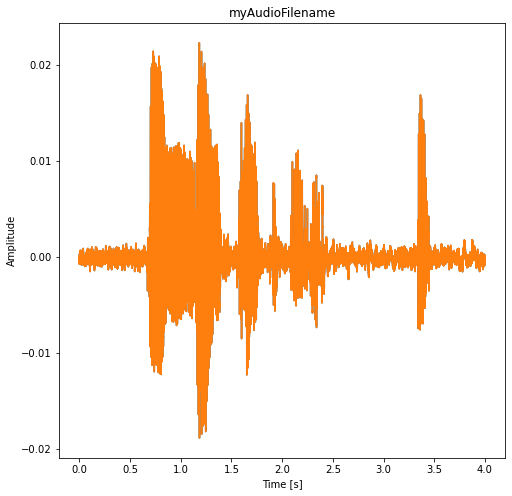

In [1]:
import os
import scipy.io
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt

wavedata = 'audio/example1.wav'  #  plot this wav file     ~/audio/aaa.wav

   
sampleRate, audioBuffer = scipy.io.wavfile.read(wavedata)

duration = len(audioBuffer)/sampleRate

time = np.arange(0,duration,1/sampleRate) #time vector

plt.figure(figsize=(8, 8))
plt.plot(time,audioBuffer)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('myAudioFilename')
plt.show()


In [9]:
from utils import normalize_wav, play_sound

normalized_wav = normalize_wav(audioBuffer)

In [10]:
normalized_wav.max()

1.0

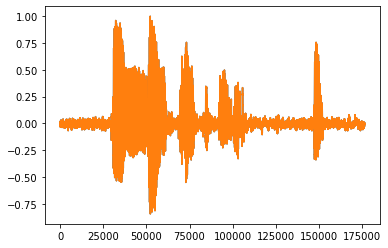

In [11]:
plt.plot(normalized_wav)
plt.show()


In [12]:
fs = 44100
play_sound(normalized_wav,fs)


começando reproducao do audio
finalizado!


In [13]:
play_sound(audioBuffer,fs)


começando reproducao do audio
finalizado!


In [14]:
def low_pass_filter(wav_array, cutoff_hz, fs):
    from scipy import signal as sg
    nyq_rate = fs/2
    width = 5.0/nyq_rate
    ripple_db = 120.0  # dB
    N, beta = sg.kaiserord(ripple_db, width)
    taps = sg.firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))

    return(sg.lfilter(taps, 1.0, wav_array))


In [21]:
norm_wv = normalized_wav[:,1]

In [22]:
filtered_wav = low_pass_filter(norm_wv, 4000, fs)

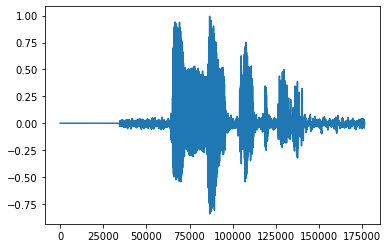

In [23]:
plt.plot(filtered_wav)

In [25]:
2e4

20000.0

In [26]:
portadora = 2e4
t = np.linspace(0, len(filtered_wav)/fs, len(filtered_wav))
portadoraSig = np.cos(2*np.pi*portadora*t)
yMod = filtered_wav*portadoraSig


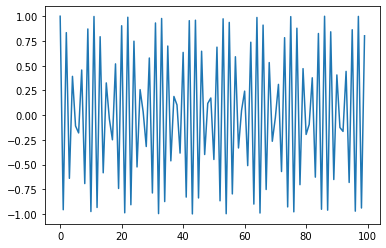

In [45]:
plt.plot(portadoraSig[:100])

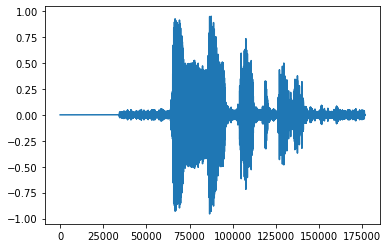

In [28]:
plt.plot(yMod)
plt.show()